Fitting 5 folds for each of 90 candidates, totalling 450 fits
===== BEST PARAMETERS =====
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9503

===== FINAL MODEL EVALUATION =====
Accuracy: 0.9472

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



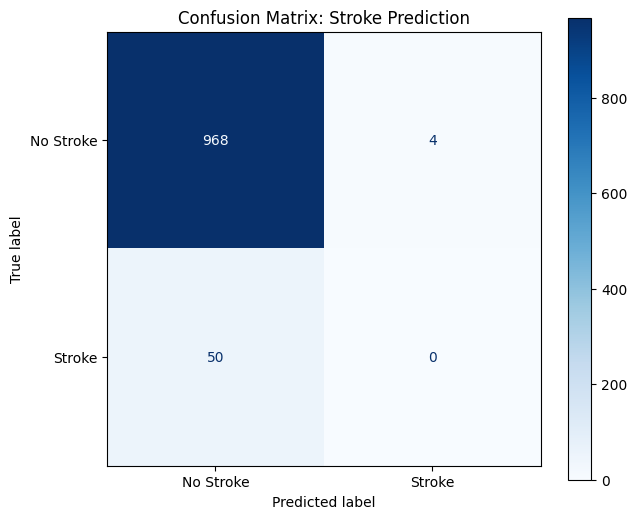

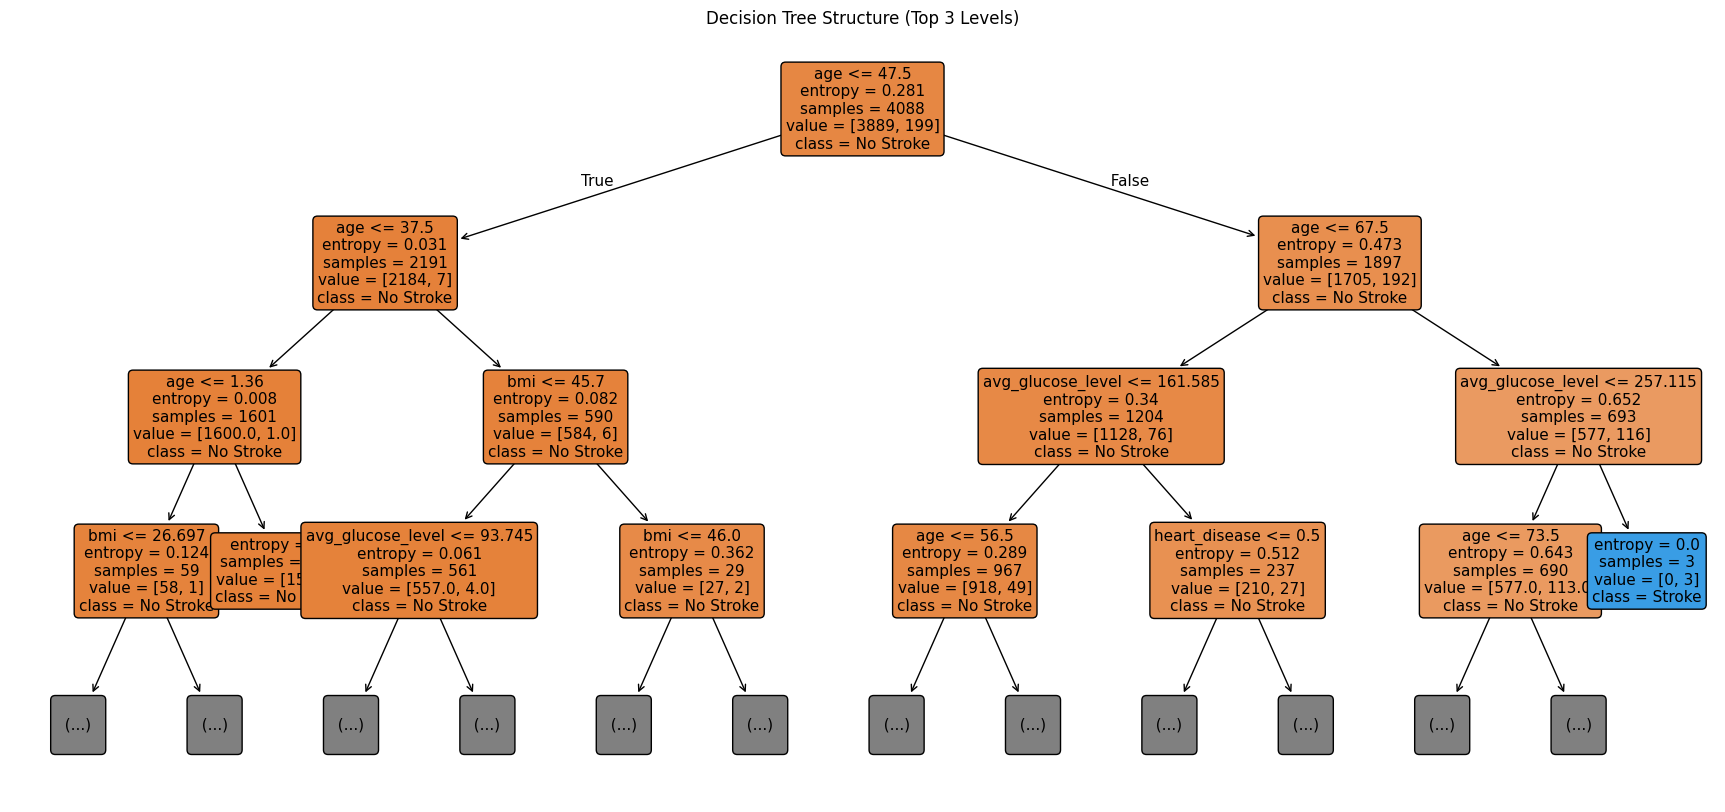

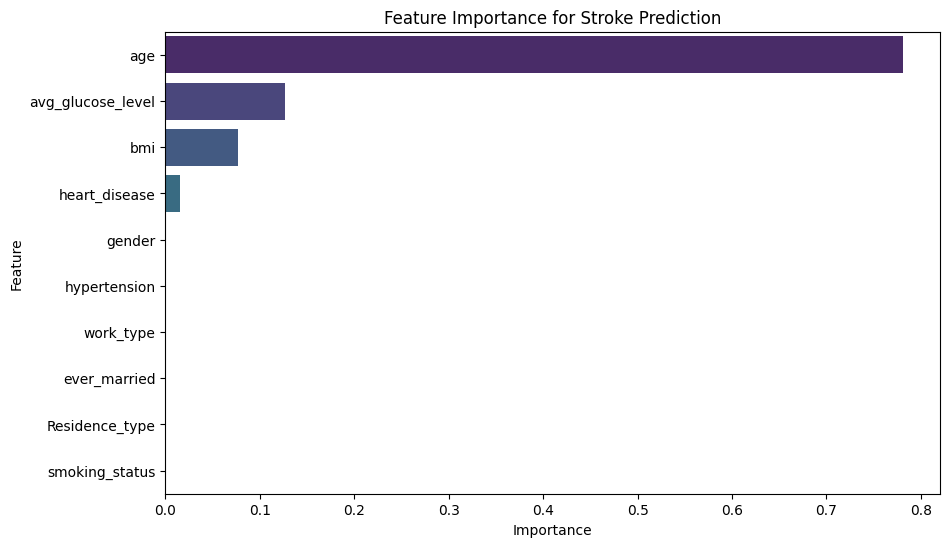

In [2]:
# Decision Tree Classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

#  Data Preprocessing
df.drop("id", axis=1, inplace=True)

# Handle missing values (BMI)
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# ---------- Features & Target ----------
X = df.drop("stroke", axis=1)
y = df["stroke"]

# ---------- Train-Test Split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------- Decision Tree Model ----------
dtree = DecisionTreeClassifier(random_state=42)

# ---------- Hyperparameter Grid ----------
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

# ---------- Grid Search ----------
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("===== BEST PARAMETERS =====")
print(grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# ---------- Best Model ----------
best_model = grid_search.best_estimator_

# ---------- Prediction ----------
y_pred = best_model.predict(X_test)

# ---------- Evaluation ----------
print("\n===== FINAL MODEL EVALUATION =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ---------- Confusion Matrix ----------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Stroke", "Stroke"]
)

fig, ax = plt.subplots(figsize=(7, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix: Stroke Prediction")
plt.show()

# ---------- Tree Visualization (Top 3 Levels) ----------
plt.figure(figsize=(22, 10))
plot_tree(
    best_model,
    max_depth=3,
    feature_names=X.columns,
    class_names=["No Stroke", "Stroke"],
    filled=True,
    rounded=True,
    fontsize=11
)
plt.title("Decision Tree Structure (Top 3 Levels)")
plt.show()

# ---------- Feature Importance ----------
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df,
    palette="viridis",
    hue="Feature",
    legend=False
)
plt.title("Feature Importance for Stroke Prediction")
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
===== BEST PARAMETERS =====
{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9513

===== FINAL MODEL EVALUATION =====
Accuracy: 0.9511

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



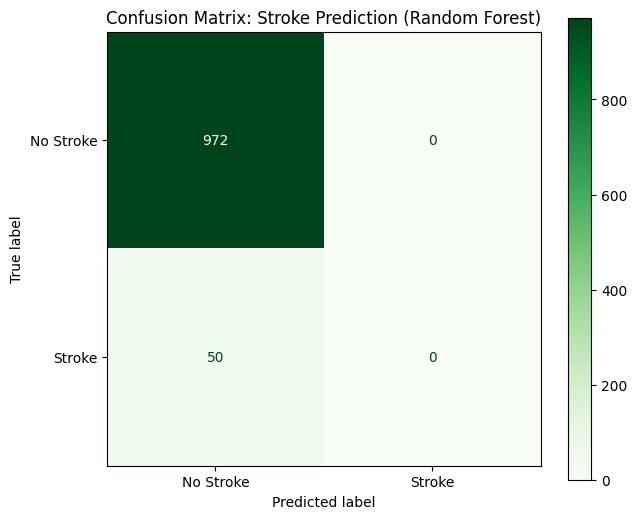

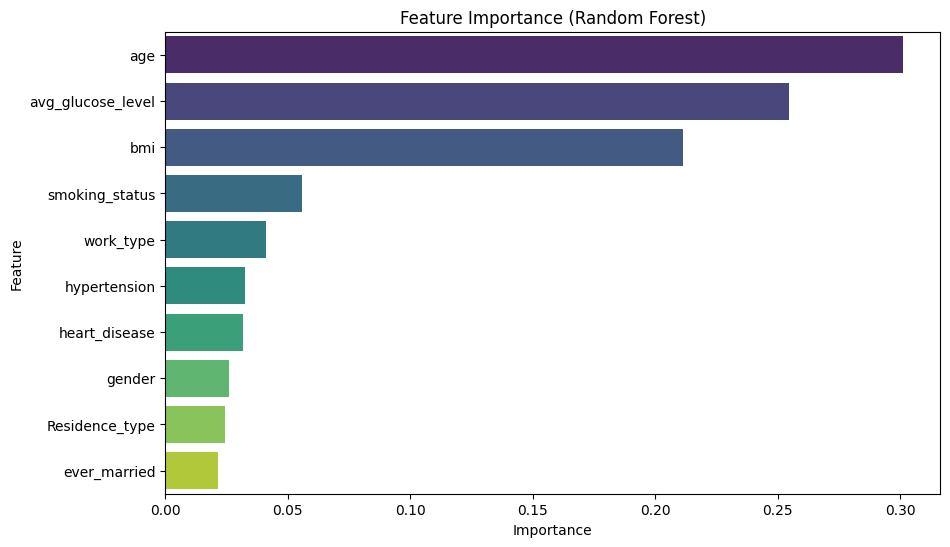

In [7]:
# Random Forest Classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ---------- Load Dataset ----------
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# ---------- Data Preprocessing ----------
# Drop ID column
df.drop("id", axis=1, inplace=True)

# Handle missing BMI values
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# ---------- Features & Target ----------
X = df.drop("stroke", axis=1)
y = df["stroke"]

# ---------- Train-Test Split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------- Random Forest Model ----------
rf = RandomForestClassifier(random_state=42)

# ---------- Hyperparameter Grid ----------
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5]
}

# ---------- Grid Search ----------
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("===== BEST PARAMETERS =====")
print(grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# ---------- Best Model ----------
best_model = grid_search.best_estimator_

# ---------- Prediction ----------
y_pred = best_model.predict(X_test)

# ---------- Evaluation ----------
print("\n===== FINAL MODEL EVALUATION =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# ---------- Confusion Matrix ----------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Stroke", "Stroke"]
)

fig, ax = plt.subplots(figsize=(7, 6))
disp.plot(cmap="Greens", ax=ax)
plt.title("Confusion Matrix: Stroke Prediction (Random Forest)")
plt.show()

# ---------- Feature Importance ----------
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df,
    palette="viridis",
    hue="Feature",
    legend=False
)
plt.title("Feature Importance (Random Forest)")
plt.show()